# Crude Oil Production Analysis

## Introduction

Crude oil production is a critical component of the global energy market and has significant implications for economies and industries worldwide. This project aims to analyze crude oil production data to uncover trends, patterns, and insights that can inform decision-making in the energy sector.

### Objectives
- **Data Collection**: Gather historical crude oil production data from reliable sources.
- **Data Cleaning**: Process the data to handle missing values, outliers, and inconsistencies.
- **Exploratory Data Analysis (EDA)**: Use statistical methods and visualizations to explore the data.
- **Trend Analysis**: Identify and analyze long-term trends in crude oil production.
- **Predictive Modeling**: Build models to forecast future production levels.

### Dataset
The dataset used in this project includes:
- Historical crude oil production data of Volve field.

### Tools and Technologies
- **Python**: Programming language used for data analysis and modeling.
- **Pandas**: Library for data manipulation and analysis.
- **Plotly.JS**: Libraries for data visualization.
- **Scikit-learn**: Machine learning library for predictive modeling.

### Structure of the Notebook
1. **Data Collection and Cleaning**: Steps to gather and preprocess the data.
2. **Exploratory Data Analysis**: Visualizations and statistical analysis of the data.
3. **Trend Analysis**: Examination of production trends over time.
4. **Predictive Modeling**: Development and evaluation of predictive models.
5. **Conclusions and Insights**: Key findings and their implications for the industry.

By the end of this project, we aim to provide a comprehensive analysis of crude oil production trends and deliver actionable insights that can help stakeholders in making informed decisions.


## Importing libraries and getting started

In [2]:
import pandas as pd
import numpy as np

import plotly.express as px
import seaborn as sns

seed = 0

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
data = pd.read_excel('data/volve-field-daily-data.xlsx')

In [4]:
data.head()

DATEPRD WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
0 2014-04-07  NO 15/9-F-1 C                7405         15/9-F-1 C   
1 2014-04-08  NO 15/9-F-1 C                7405         15/9-F-1 C   
2 2014-04-09  NO 15/9-F-1 C                7405         15/9-F-1 C   
3 2014-04-10  NO 15/9-F-1 C                7405         15/9-F-1 C   
4 2014-04-11  NO 15/9-F-1 C                7405         15/9-F-1 C   

   NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
0         3420717          VOLVE             369304    MÆRSK INSPIRER   
1         3420717          VOLVE             369304    MÆRSK INSPIRER   
2         3420717          VOLVE             369304    MÆRSK INSPIRER   
3         3420717          VOLVE             369304    MÆRSK INSPIRER   
4         3420717          VOLVE             369304    MÆRSK INSPIRER   

   ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
0            0.0                0.00000                   0.00000   
1            0.0                    NaN                       NaN   
2            0.0                    NaN                       NaN   
3            0.0                    NaN                       NaN   
4            0.0              310.37614                  96.87589   

   AVG_DP_TUBING  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM  \
0        0.00000                0.0          0.000000             %   
1            NaN                0.0          1.003059             %   
2            NaN                0.0          0.979008             %   
3            NaN                0.0          0.545759             %   
4      277.27826                0.0          1.215987             %   

   AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  \
0    0.00000    0.00000        0.00000           0.0           0.0   
1    0.00000    0.00000        0.00000           0.0           0.0   
2    0.00000    0.00000        0.00000           0.0           0.0   
3    0.00000    0.00000        0.00000           0.0           0.0   
4   33.09788   10.47992       33.07195           0.0           0.0   

   BORE_WAT_VOL  BORE_WI_VOL   FLOW_KIND WELL_TYPE  
0           0.0          NaN  production        WI  
1           0.0          NaN  production        OP  
2           0.0          NaN  production        OP  
3           0.0          NaN  production        OP  
4           0.0          NaN  production        OP

In [5]:
data.nunique()

DATEPRD                     3327
WELL_BORE_CODE                 7
NPD_WELL_BORE_CODE             7
NPD_WELL_BORE_NAME             7
NPD_FIELD_CODE                 1
NPD_FIELD_NAME                 1
NPD_FACILITY_CODE              1
NPD_FACILITY_NAME              1
ON_STREAM_HRS                925
AVG_DOWNHOLE_PRESSURE       6567
AVG_DOWNHOLE_TEMPERATURE    6461
AVG_DP_TUBING               8684
AVG_ANNULUS_PRESS           6644
AVG_CHOKE_SIZE_P            6419
AVG_CHOKE_UOM                  1
AVG_WHP_P                   8829
AVG_WHT_P                   8793
DP_CHOKE_SIZE               9057
BORE_OIL_VOL                7818
BORE_GAS_VOL                8005
BORE_WAT_VOL                7361
BORE_WI_VOL                 5258
FLOW_KIND                      2
WELL_TYPE                      2
dtype: int64

In [6]:
data.shape

(15634, 24)

In [7]:
data.isna().sum()

DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                285
AVG_DOWNHOLE_PRESSURE       6654
AVG_DOWNHOLE_TEMPERATURE    6654
AVG_DP_TUBING               6654
AVG_ANNULUS_PRESS           7744
AVG_CHOKE_SIZE_P            6715
AVG_CHOKE_UOM               6473
AVG_WHP_P                   6479
AVG_WHT_P                   6488
DP_CHOKE_SIZE                294
BORE_OIL_VOL                6473
BORE_GAS_VOL                6473
BORE_WAT_VOL                6473
BORE_WI_VOL                 9928
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

In [8]:
for col in data.columns:
    print(col, round(data[col].isna().sum() / (data.shape[0]*data.shape[1]) * 100, 2))

DATEPRD 0.0
WELL_BORE_CODE 0.0
NPD_WELL_BORE_CODE 0.0
NPD_WELL_BORE_NAME 0.0
NPD_FIELD_CODE 0.0
NPD_FIELD_NAME 0.0
NPD_FACILITY_CODE 0.0
NPD_FACILITY_NAME 0.0
ON_STREAM_HRS 0.08
AVG_DOWNHOLE_PRESSURE 1.77
AVG_DOWNHOLE_TEMPERATURE 1.77
AVG_DP_TUBING 1.77
AVG_ANNULUS_PRESS 2.06
AVG_CHOKE_SIZE_P 1.79
AVG_CHOKE_UOM 1.73
AVG_WHP_P 1.73
AVG_WHT_P 1.73
DP_CHOKE_SIZE 0.08
BORE_OIL_VOL 1.73
BORE_GAS_VOL 1.73
BORE_WAT_VOL 1.73
BORE_WI_VOL 2.65
FLOW_KIND 0.0
WELL_TYPE 0.0


In [9]:
data.isna().sum().sum() / (data.shape[0]*data.shape[1]) * 100

22.33033772547013

22.33% of our data is NaN values. <br />
Percentage NaN values by columns is given below
| Column Name                | Percentage NaN |
|----------------------------|----------------|
| DATEPRD                    | 0.0            |
| WELL_BORE_CODE             | 0.0            |
| NPD_WELL_BORE_CODE         | 0.0            |
| NPD_WELL_BORE_NAME         | 0.0            |
| NPD_FIELD_CODE             | 0.0            |
| NPD_FIELD_NAME             | 0.0            |
| NPD_FACILITY_CODE          | 0.0            |
| NPD_FACILITY_NAME          | 0.0            |
| ON_STREAM_HRS              | 0.08           |
| AVG_DOWNHOLE_PRESSURE      | 1.77           |
| AVG_DOWNHOLE_TEMPERATURE   | 1.77           |
| AVG_DP_TUBING              | 1.77           |
| AVG_ANNULUS_PRESS          | 2.06           |
| AVG_CHOKE_SIZE_P           | 1.79           |
| AVG_CHOKE_UOM              | 1.73           |
| AVG_WHP_P                  | 1.73           |
| AVG_WHT_P                  | 1.73           |
| DP_CHOKE_SIZE              | 0.08           |
| BORE_OIL_VOL               | 1.73           |
| BORE_GAS_VOL               | 1.73           |
| BORE_WAT_VOL               | 1.73           |
| BORE_WI_VOL                | 2.65           |
| FLOW_KIND                  | 0.0            |
| WELL_TYPE                  | 0.0            |


In [10]:
np.unique(data['NPD_WELL_BORE_CODE'])

array([5351, 5599, 5693, 5769, 7078, 7289, 7405], dtype=int64)

In [11]:
grouped_data = data.groupby('NPD_WELL_BORE_CODE')

In [12]:
dataframes = {well_bore_code : group for well_bore_code, group in grouped_data}

In [13]:
data_well1, data_well2, data_well3, data_well4, data_well5, data_well6, data_well7 = dataframes.values()

In [14]:
print(data_well1.shape, data_well2.shape, data_well3.shape, data_well4.shape, data_well5.shape, data_well6.shape, data_well7.shape)

(3056, 24) (3056, 24) (3327, 24) (3306, 24) (1165, 24) (978, 24) (746, 24)


## Analysis for well NO 15/9-F-14 H || 5351 starts below

In [15]:
data_well1.head()

DATEPRD  WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
4967 2008-02-12  NO 15/9-F-14 H                5351          15/9-F-14   
4968 2008-02-13  NO 15/9-F-14 H                5351          15/9-F-14   
4969 2008-02-14  NO 15/9-F-14 H                5351          15/9-F-14   
4970 2008-02-15  NO 15/9-F-14 H                5351          15/9-F-14   
4971 2008-02-16  NO 15/9-F-14 H                5351          15/9-F-14   

      NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
4967         3420717          VOLVE             369304    MÆRSK INSPIRER   
4968         3420717          VOLVE             369304    MÆRSK INSPIRER   
4969         3420717          VOLVE             369304    MÆRSK INSPIRER   
4970         3420717          VOLVE             369304    MÆRSK INSPIRER   
4971         3420717          VOLVE             369304    MÆRSK INSPIRER   

      ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
4967            0.0                    0.0                       0.0   
4968            0.0                    0.0                       0.0   
4969            0.0                    0.0                       0.0   
4970            0.0                    0.0                       0.0   
4971            0.0                    0.0                       0.0   

      AVG_DP_TUBING  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM  \
4967            0.0            0.00000               NaN             %   
4968            0.0            0.00000               NaN             %   
4969            0.0            0.00000               NaN             %   
4970            0.0            0.00006               NaN             %   
4971            0.0            0.00006               NaN             %   

      AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  \
4967        0.0        0.0        0.05885           0.0           0.0   
4968        0.0        0.0        0.06768           0.0           0.0   
4969        0.0        0.0        0.04950           0.0           0.0   
4970        0.0        0.0        0.06640           0.0           0.0   
4971        0.0        0.0        0.10479           0.0           0.0   

      BORE_WAT_VOL  BORE_WI_VOL   FLOW_KIND WELL_TYPE  
4967           0.0          NaN  production        OP  
4968           0.0          NaN  production        OP  
4969           0.0          NaN  production        OP  
4970           0.0          NaN  production        OP  
4971           0.0          NaN  production        OP

In [16]:
data_well1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3056 entries, 4967 to 8022
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   3056 non-null   datetime64[ns]
 1   WELL_BORE_CODE            3056 non-null   object        
 2   NPD_WELL_BORE_CODE        3056 non-null   int64         
 3   NPD_WELL_BORE_NAME        3056 non-null   object        
 4   NPD_FIELD_CODE            3056 non-null   int64         
 5   NPD_FIELD_NAME            3056 non-null   object        
 6   NPD_FACILITY_CODE         3056 non-null   int64         
 7   NPD_FACILITY_NAME         3056 non-null   object        
 8   ON_STREAM_HRS             3056 non-null   float64       
 9   AVG_DOWNHOLE_PRESSURE     3050 non-null   float64       
 10  AVG_DOWNHOLE_TEMPERATURE  3050 non-null   float64       
 11  AVG_DP_TUBING             3050 non-null   float64       
 12  AVG_ANNULUS_PRESS     

In [17]:
data_well1.nunique()

DATEPRD                     3056
WELL_BORE_CODE                 1
NPD_WELL_BORE_CODE             1
NPD_WELL_BORE_NAME             1
NPD_FIELD_CODE                 1
NPD_FIELD_NAME                 1
NPD_FACILITY_CODE              1
NPD_FACILITY_NAME              1
ON_STREAM_HRS                280
AVG_DOWNHOLE_PRESSURE       2837
AVG_DOWNHOLE_TEMPERATURE    2733
AVG_DP_TUBING               2900
AVG_ANNULUS_PRESS           1482
AVG_CHOKE_SIZE_P            1672
AVG_CHOKE_UOM                  1
AVG_WHP_P                   2894
AVG_WHT_P                   2862
DP_CHOKE_SIZE               3041
BORE_OIL_VOL                2705
BORE_GAS_VOL                2723
BORE_WAT_VOL                2676
BORE_WI_VOL                    0
FLOW_KIND                      1
WELL_TYPE                      1
dtype: int64

In [41]:
y = data_well1.select_dtypes(exclude='object').columns
y
fig = px.line(data_well1, 
              x = 'DATEPRD', 
              y = y[4:], 
              log_y=True, 
              title = 'Line chart of all numeric values for well NO 15/9-F-14 H',
              height = 800,
              )
fig.update_layout(xaxis_title = 'DATE', yaxis_title = 'Log Observation')
fig.update_xaxes(rangeslider_visible = True)

fig.show()

In [19]:
data_well1.isna().sum()

DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                  0
AVG_DOWNHOLE_PRESSURE          6
AVG_DOWNHOLE_TEMPERATURE       6
AVG_DP_TUBING                  6
AVG_ANNULUS_PRESS            523
AVG_CHOKE_SIZE_P             196
AVG_CHOKE_UOM                  0
AVG_WHP_P                      0
AVG_WHT_P                      0
DP_CHOKE_SIZE                  0
BORE_OIL_VOL                   0
BORE_GAS_VOL                   0
BORE_WAT_VOL                   0
BORE_WI_VOL                 3056
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

In [20]:
data_temp = data_well1.drop(columns='BORE_WI_VOL').dropna()

<Axes: >

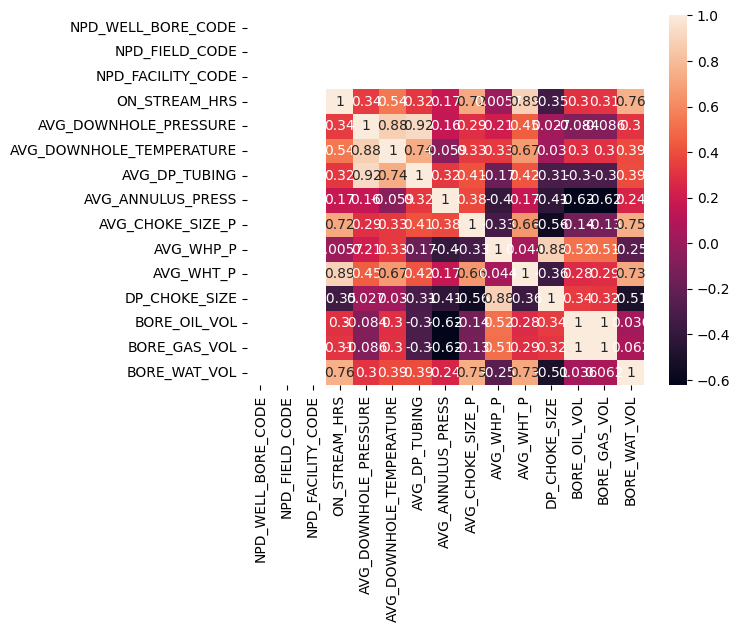

In [21]:
sns.heatmap(data_temp.corr(numeric_only=True), annot = True)

In [22]:
data_well2.head(10)

DATEPRD  WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
1911 2008-02-12  NO 15/9-F-12 H                5599          15/9-F-12   
1912 2008-02-13  NO 15/9-F-12 H                5599          15/9-F-12   
1913 2008-02-14  NO 15/9-F-12 H                5599          15/9-F-12   
1914 2008-02-15  NO 15/9-F-12 H                5599          15/9-F-12   
1915 2008-02-16  NO 15/9-F-12 H                5599          15/9-F-12   
1916 2008-02-17  NO 15/9-F-12 H                5599          15/9-F-12   
1917 2008-02-18  NO 15/9-F-12 H                5599          15/9-F-12   
1918 2008-02-19  NO 15/9-F-12 H                5599          15/9-F-12   
1919 2008-02-20  NO 15/9-F-12 H                5599          15/9-F-12   
1920 2008-02-21  NO 15/9-F-12 H                5599          15/9-F-12   

      NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
1911         3420717          VOLVE             369304    MÆRSK INSPIRER   
1912         3420717          VOLVE             369304    MÆRSK INSPIRER   
1913         3420717          VOLVE             369304    MÆRSK INSPIRER   
1914         3420717          VOLVE             369304    MÆRSK INSPIRER   
1915         3420717          VOLVE             369304    MÆRSK INSPIRER   
1916         3420717          VOLVE             369304    MÆRSK INSPIRER   
1917         3420717          VOLVE             369304    MÆRSK INSPIRER   
1918         3420717          VOLVE             369304    MÆRSK INSPIRER   
1919         3420717          VOLVE             369304    MÆRSK INSPIRER   
1920         3420717          VOLVE             369304    MÆRSK INSPIRER   

      ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
1911          11.50             308.055940                104.418090   
1912          24.00             303.033518                105.402696   
1913          22.50             295.586061                105.775486   
1914          23.15             297.662702                105.751875   
1915          24.00             295.935519                105.811114   
1916          24.00             295.551657                105.831299   
1917          23.00             294.211063                105.866467   
1918          24.00             293.829243                105.867958   
1919          24.00             293.061480                105.879330   
1920          24.00             292.540247                105.883434   

      AVG_DP_TUBING  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM  \
1911     201.250000          18.639557         14.484431             %   
1912     182.144942          16.466641         22.832986             %   
1913     181.867887          12.659589         31.249966             %   
1914     180.832060           5.264052         28.518930             %   
1915     180.501045          12.384634         30.227902             %   
1916     180.345781          14.384565         29.974052             %   
1917     180.929248          15.980444         30.308403             %   
1918     180.060115          18.811254         30.486977             %   
1919     179.661744          19.740757         29.907024             %   
1920     179.433895          19.431675         30.493011             %   

       AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  \
1911  106.805939  16.294718      92.475107        284.65      38888.67   
1912  120.888576  53.374330      89.620148       1869.70     285246.16   
1913  113.718175  72.737631      80.120465       3124.09     509954.88   
1914  116.830642  69.995943      84.250990       2608.28     383426.67   
1915  115.434474  71.518347      82.359026       3051.80     418474.00   
1916  115.205876  73.641800      82.168501       2982.63     422763.00   
1917  113.281815  74.160157      80.263045       2980.52     413831.00   
1918  113.769128  74.901839      81.274949       3046.19     429218.00   
1919  113.399737  73.039017      80.773921       3057.18     442982.75   
1920  11

| Column                  | Description                                                     |
|-------------------------|-----------------------------------------------------------------|
| DATEPRD                 | The date of the production data entry                           |
| WELL_BORE_CODE          | A unique identifier for the well bore                           |
| NPD_WELL_BORE_CODE      | The Norwegian Petroleum Directorate (NPD) specific code for the well bore |
| NPD_WELL_BORE_NAME      | The name of the well bore as per the NPD                        |
| NPD_FIELD_CODE          | The NPD code for the oil field                                  |
| NPD_FIELD_NAME          | The name of the oil field as per the NPD                        |
| NPD_FACILITY_CODE       | The NPD code for the facility                                   |
| NPD_FACILITY_NAME       | The name of the facility as per the NPD                         |
| ON_STREAM_HRS           | The number of hours the well was producing                      |
| AVG_DOWNHOLE_PRESSURE   | The average pressure measured downhole (in the wellbore)        |
| AVG_DOWNHOLE_TEMPERATURE| The average temperature measured downhole                       |
| AVG_DP_TUBING           | The average differential pressure in the tubing                 |
| AVG_ANNULUS_PRESS       | The average pressure in the annulus (the space between the wellbore and the tubing) |
| AVG_CHOKE_SIZE_P        | The average size of the production choke (controls flow rate)   |
| AVG_CHOKE_UOM           | The unit of measurement for the choke size                      |
| AVG_WHP_P               | The average wellhead pressure (pressure at the surface of the well) |
| AVG_WHT_P               | The average wellhead temperature                                |
| DP_CHOKE_SIZE           | The differential pressure across the choke                      |
| BORE_OIL_VOL            | The volume of oil produced                                      |
| BORE_GAS_VOL            | The volume of gas produced                                      |
| BORE_WAT_VOL            | The volume of water produced                                    |
| BORE_WI_VOL             | The volume of water injected                                    |
| FLOW_KIND               | The type of flow (e.g., production, injection)                  |
| WELL_TYPE               | The type of well (e.g., oil, gas, water injection)              |


In [54]:
y = data_well1.select_dtypes(exclude='object').columns
y
fig = px.line(data_well4, 
              x = 'DATEPRD', 
              y = y[4:], 
              log_y=True, 
              title = 'Line chart of all numeric values for well NO 15/9-F-5 AH	',
              height = 800,
              )
fig.update_layout(xaxis_title = 'DATE', yaxis_title = 'Log Observation')
fig.update_xaxes(rangeslider_visible = True)

fig.show()

In [57]:
np.unique(data_well4[['FLOW_KIND', 'WELL_TYPE']])

array(['OP', 'WI', 'injection', 'production'], dtype=object)

In [60]:
data_well7.shape[0] * .80

596.8000000000001